In [1]:
'''
Author: U. Saxena
Modeling Post-Disaster Infrastructure Restoration & Damamge Assessment
DAEN 690
Obj - The goal of this notebook is to perform EDA on Datasets
'''

'\nAuthor: U. Saxena\nModeling Post-Disaster Infrastructure Restoration & Damamge Assessment\nDAEN 690\nObj - The goal of this notebook is to perform EDA on Datasets\n'

In [34]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [35]:
'''
Dataset 1 - Highwater Incidents.csv
Cleaning performed: 
    1. Remvoed unnecessary columns
    2. Split the Date & Time for cleared and entered
'''

'\nDataset 1 - Highwater Incidents.csv\nCleaning performed: \n    1. Remvoed unnecessary columns\n    2. Split the Date & Time for cleared and entered\n'

In [36]:
incidents = pd.read_csv("C:/Users/chakr/OneDrive/Desktop/DAEN 690/harvey_highwater_incidents_modified.csv")

In [37]:
incidents.head()

,ROADWAY_NAME,TXDOT_ROADWAY_DIRECTION,LATITUDE_IB_CW,LATITUDE_OB_CCW,LONGITUDE_IB_CW,LONGITUDE_OB_CCW,COUNTY_NAME,TIME_ENTERED,CLEARED_DATE_TIME,TOTAL_MINUTES
0,BELTWAY 8-EAST,Southbound,29.8085,29.8089,-95.1639,-95.1628,Harris,8/26/2017 3:56,8/26/2017 3:56,0
1,BELTWAY 8-EAST,Northbound,29.6656,29.6656,-95.1558,-95.1556,Harris,8/26/2017 8:06,8/26/2017 14:03,357
2,BELTWAY 8-EAST,Northbound,29.8830,29.8830,-95.1984,-95.1984,Harris,8/27/2017 1:50,8/30/2017 8:55,4745
3,BELTWAY 8-EAST,Southbound,29.8830,29.8830,-95.1984,-95.1984,Harris,8/27/2017 8:49,8/30/2017 9:20,4351
4,BELTWAY 8-EAST,Northbound,29.6498,29.6498,-95.1562,-95.1561,Harris,8/27/2017 11:55,8/30/2017 8:53,4138


In [38]:
#Split the TIME_ENTERED COLUMN in TIME and DATE
split_data = incidents["TIME_ENTERED"].str.split(" ")
dataTemp = split_data.to_list()
names = ["ENTER_DATE", "ENTER_TIME"]
new_df = pd.DataFrame(dataTemp, columns=names)

In [39]:
#add the cols
incidents["ENTER_DATE"] = new_df["ENTER_DATE"];
incidents["ENTER_TIME"] = new_df["ENTER_TIME"];

In [41]:
#Split the CLEARED_DATE_TIME COLUMN in TIME and DATE
split_data = incidents["CLEARED_DATE_TIME"].str.split(" ")
dataTemp = split_data.to_list()
names = ["CLEAR_DATE", "CLEAR_TIME"]
new_df = pd.DataFrame(dataTemp, columns=names)

In [42]:
#add the cols
incidents["CLEAR_DATE"] = new_df["CLEAR_DATE"];
incidents["CLEAR_TIME"] = new_df["CLEAR_TIME"];

In [43]:
#drop the cols
incidents = incidents.drop(columns={'TIME_ENTERED', 'CLEARED_DATE_TIME'})

In [44]:
#save it as a csv
incidents.to_csv("harvey_highwater_incidents_FINAL.csv", index = False, header = True)

In [45]:
inc_df = pd.read_csv("harvey_highwater_incidents_FINAL.csv")

In [46]:
inc_df.head()

,ROADWAY_NAME,TXDOT_ROADWAY_DIRECTION,LATITUDE_IB_CW,LATITUDE_OB_CCW,LONGITUDE_IB_CW,LONGITUDE_OB_CCW,COUNTY_NAME,TOTAL_MINUTES,ENTER_DATE,ENTER_TIME,CLEAR_DATE,CLEAR_TIME
0,BELTWAY 8-EAST,Southbound,29.8085,29.8089,-95.1639,-95.1628,Harris,0,8/26/2017,3:56,8/26/2017,3:56
1,BELTWAY 8-EAST,Northbound,29.6656,29.6656,-95.1558,-95.1556,Harris,357,8/26/2017,8:06,8/26/2017,14:03
2,BELTWAY 8-EAST,Northbound,29.8830,29.8830,-95.1984,-95.1984,Harris,4745,8/27/2017,1:50,8/30/2017,8:55
3,BELTWAY 8-EAST,Southbound,29.8830,29.8830,-95.1984,-95.1984,Harris,4351,8/27/2017,8:49,8/30/2017,9:20
4,BELTWAY 8-EAST,Northbound,29.6498,29.6498,-95.1562,-95.1561,Harris,4138,8/27/2017,11:55,8/30/2017,8:53


In [47]:
#check no. of rows in dataset
inc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ROADWAY_NAME             468 non-null    object 
 1   TXDOT_ROADWAY_DIRECTION  468 non-null    object 
 2   LATITUDE_IB_CW           468 non-null    float64
 3   LATITUDE_OB_CCW          468 non-null    float64
 4   LONGITUDE_IB_CW          468 non-null    float64
 5   LONGITUDE_OB_CCW         468 non-null    float64
 6   COUNTY_NAME              468 non-null    object 
 7   TOTAL_MINUTES            468 non-null    int64  
 8   ENTER_DATE               468 non-null    object 
 9   ENTER_TIME               468 non-null    object 
 10  CLEAR_DATE               468 non-null    object 
 11  CLEAR_TIME               468 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 44.0+ KB


In [48]:
#check for duplicates
dup_rows_df = inc_df[inc_df.duplicated()]
print("No. of rows duplicated: ", dup_rows_df.shape)

No. of rows duplicated:  (0, 12)


In [49]:
#check for categorical variables:
for key, value in inc_df.iteritems():
    print(key, " - Unique Values: ")
    print(*list(inc_df[key].unique()))
    
#Categorical columns: clear_date, enter_date, County_name, TXDOT_ROADWAY_DIRECTION, ROADWAY_NAME (maybe)

ROADWAY_NAME  - Unique Values: 
BELTWAY 8-EAST BELTWAY 8-NORTH BELTWAY 8-SOUTH BELTWAY 8-WEST BS-290 FM-1092 FM-1093 FM-1128 FM-1458 FM-1459 FM-1462 FM-1463 FM-1464 FM-1488 FM-1764 FM-1887 FM-1960 FM-2090 FM-2855 FM-2919 FM-2920 FM-2977 FM-362 FM-517 FM-518 FM-521 FM-522 FM-529 HARDY TOLL ROAD IH-10 IH-10 EAST IH-10 KATY IH-45 IH-45 GULF IH-45 NORTH IH-610 EAST LOOP IH-610 NORTH LOOP IH-610 SOUTH LOOP IH-610 WEST LOOP IH-69 IH-69 Eastex Freeway IH-69 SOUTHWEST LOOP-494 NASA RD 1 SH 275 / HARBORSIDE SH-105 SH-146 SH-225 SH-249 TOMBALL PARKWAY SH-288 SH-3 SH-35 SH-36 SH-6 SH-87/ Broadway SH-99 Lanier Pkwy SH-99 Lanier Pkwy - North SH-99 Lanier Pkwy - West SHT SPUR-342 Tomball Tollway US-290 US-290 NORTHWEST US-90 US-90 ALTERNATE WT
TXDOT_ROADWAY_DIRECTION  - Unique Values: 
Southbound Northbound Eastbound Westbound
LATITUDE_IB_CW  - Unique Values: 
29.8085 29.6656 29.883000000000006 29.6498 29.9396 29.9392 29.9397 29.9387 29.9391 29.9405 29.598883 29.600908 29.605712 29.6261 29.737 29.65

In [50]:
#check the datatypes for dataset
inc_df.dtypes

ROADWAY_NAME                object
TXDOT_ROADWAY_DIRECTION     object
LATITUDE_IB_CW             float64
LATITUDE_OB_CCW            float64
LONGITUDE_IB_CW            float64
LONGITUDE_OB_CCW           float64
COUNTY_NAME                 object
TOTAL_MINUTES                int64
ENTER_DATE                  object
ENTER_TIME                  object
CLEAR_DATE                  object
CLEAR_TIME                  object
dtype: object

In [51]:
#convert obj into categorical
inc_df['ROADWAY_NAME'] = pd.Categorical(inc_df['ROADWAY_NAME'])
inc_df['TXDOT_ROADWAY_DIRECTION'] = pd.Categorical(inc_df['TXDOT_ROADWAY_DIRECTION'])
inc_df['COUNTY_NAME'] = pd.Categorical(inc_df['COUNTY_NAME'])
inc_df['ENTER_DATE'] = pd.Categorical(inc_df['ENTER_DATE'])
inc_df['CLEAR_DATE'] = pd.Categorical(inc_df['CLEAR_DATE'])

In [52]:
#check for datatypes again
inc_df.dtypes

ROADWAY_NAME               category
TXDOT_ROADWAY_DIRECTION    category
LATITUDE_IB_CW              float64
LATITUDE_OB_CCW             float64
LONGITUDE_IB_CW             float64
LONGITUDE_OB_CCW            float64
COUNTY_NAME                category
TOTAL_MINUTES                 int64
ENTER_DATE                 category
ENTER_TIME                   object
CLEAR_DATE                 category
CLEAR_TIME                   object
dtype: object

In [53]:
inc_df.describe()

,LATITUDE_IB_CW,LATITUDE_OB_CCW,LONGITUDE_IB_CW,LONGITUDE_OB_CCW,TOTAL_MINUTES
count,468.000000,468.000000,468.000000,468.000000,468.000000
mean,29.756906,29.756889,-95.429006,-95.429029,3217.138889
std,0.210148,0.210178,0.261110,0.261124,1833.742929
min,29.078550,29.078550,-96.152700,-96.152700,-1.000000
25%,29.626400,29.626200,-95.562600,-95.562800,2167.500000
50%,29.770374,29.770324,-95.394974,-95.394974,3517.000000
75%,29.883028,29.883028,-95.263675,-95.263550,4354.000000
max,30.421000,30.421000,-94.388372,-94.388372,9834.000000


In [54]:
#Created a function to get the list of outliers in each column.
def getOutlier(colName):
    outliers = []
    Q1 = colName.quantile(.25)
    Q3 = colName.quantile(.75)
    IQR = Q3-Q1
    lower = Q1-(1.5*IQR)
    upper = Q3+(1.5*IQR)
    for value in colName:
        if(value > upper or value < lower):
            outliers.append(value)
    print("No. of outliers: ", len(np.array(outliers)))
    return np.array(outliers);

In [55]:
#get outlier count
print("Outliers for LATITUDE_IB_CW " , getOutlier(inc_df['LATITUDE_IB_CW']))
print("Outliers for LATITUDE_OB_CCW " , getOutlier(inc_df['LATITUDE_OB_CCW']))
print("Outliers for LONGITUDE_IB_CW " , getOutlier(inc_df['LONGITUDE_IB_CW']))
print("Outliers for LONGITUDE_OB_CCW " , getOutlier(inc_df['LONGITUDE_OB_CCW']))
print("Outliers for TOTAL_MINUTES " , getOutlier(inc_df['TOTAL_MINUTES']))

No. of outliers:  12
Outliers for LATITUDE_IB_CW  [29.07855  29.07855  29.09771  29.07855  30.3252   30.421    30.308
 30.2688   30.32798  29.143226 29.14712  29.138058]
No. of outliers:  12
Outliers for LATITUDE_OB_CCW  [29.07855  29.07855  29.09771  29.07855  30.3252   30.421    30.308
 30.2688   30.32798  29.143226 29.14712  29.138058]
No. of outliers:  21
Outliers for LONGITUDE_IB_CW  [-96.03971    -96.03345    -96.09582    -96.03252    -96.03907
 -96.08144    -96.08144    -96.026127   -96.07184    -96.11339
 -96.1527     -96.1527     -96.036      -96.035924   -94.7705656
 -94.38837158 -94.50027204 -94.76911407 -94.77320939 -96.055298
 -96.055298  ]
No. of outliers:  21
Outliers for LONGITUDE_OB_CCW  [-96.03971    -96.03345    -96.09582    -96.03252    -96.03907
 -96.08144    -96.08144    -96.026127   -96.07184    -96.11339
 -96.1527     -96.1527     -96.036      -96.035924   -94.7705656
 -94.38837158 -94.50027204 -94.76911407 -94.77320939 -96.055298
 -96.055298  ]
No. of outliers:

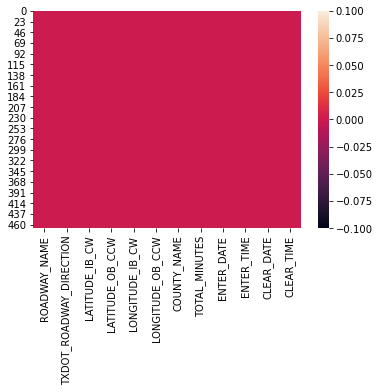

In [56]:
#check for missing vals
sn.heatmap(inc_df.isnull())

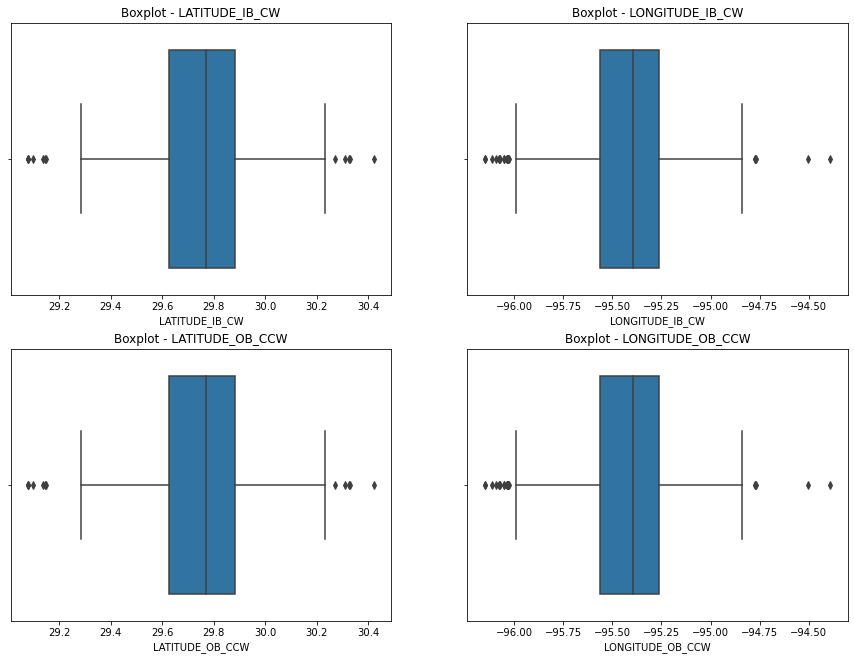

In [57]:
fix, axes = plt.subplots(nrows = 2, ncols=2, figsize=(15,11))
axes[0,0].set_title("Boxplot - LATITUDE_IB_CW")
axes[0,1].set_title("Boxplot - LONGITUDE_IB_CW")
axes[1,0].set_title("Boxplot - LATITUDE_OB_CCW")
axes[1,1].set_title("Boxplot - LONGITUDE_OB_CCW")

sn.boxplot(inc_df['LATITUDE_IB_CW'], ax=axes[0,0])
sn.boxplot(inc_df['LONGITUDE_IB_CW'], ax=axes[0,1])
sn.boxplot(inc_df['LATITUDE_OB_CCW'], ax=axes[1,0])
sn.boxplot(inc_df['LONGITUDE_OB_CCW'], ax=axes[1,1])


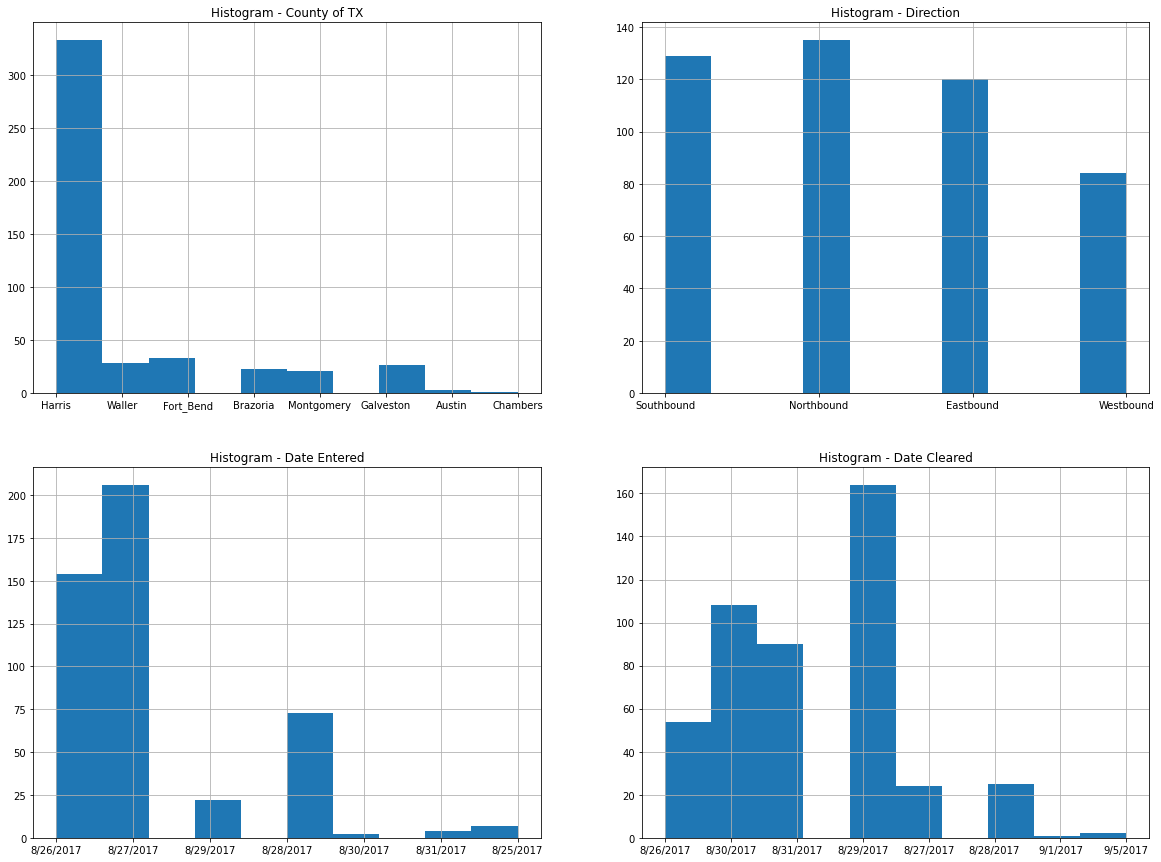

In [58]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(20,15))
axes[0,0].set_title("Histogram - County of TX")
axes[0,1].set_title("Histogram - Direction")
axes[1,0].set_title("Histogram - Date Entered")
axes[1,1].set_title("Histogram - Date Cleared")

inc_df['COUNTY_NAME'].hist(ax=axes[0,0])
inc_df['TXDOT_ROADWAY_DIRECTION'].hist(ax=axes[0,1])
inc_df['ENTER_DATE'].hist(ax=axes[1,0])
inc_df['CLEAR_DATE'].hist(ax=axes[1,1])

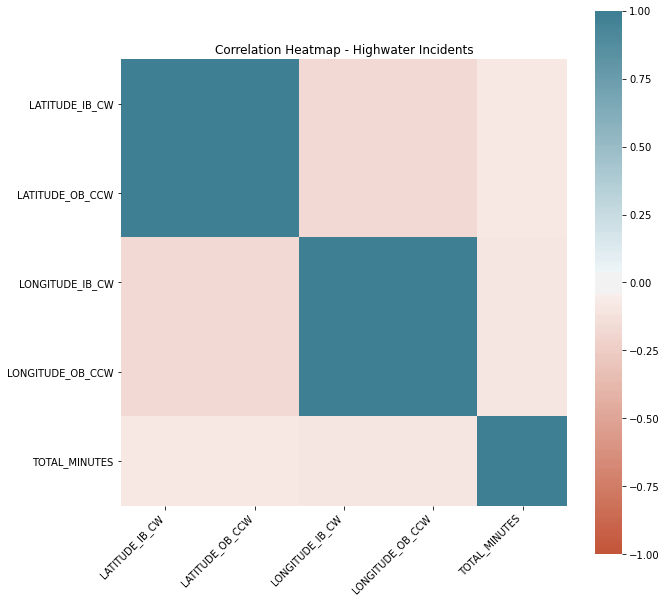

In [59]:
corr = inc_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Correlation Heatmap - Highwater Incidents")
ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

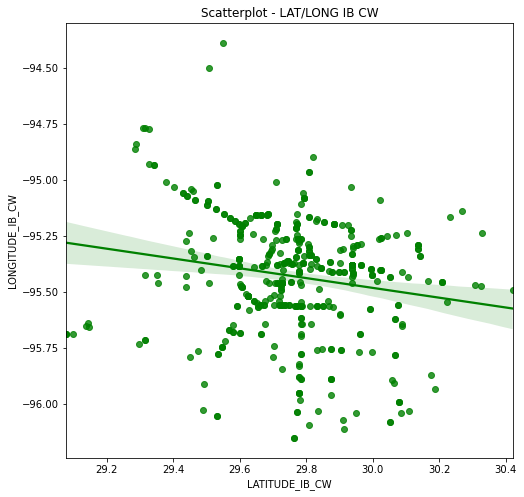

In [60]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Scatterplot - LAT/LONG IB CW")
sn.regplot(x=inc_df['LATITUDE_IB_CW'], y=inc_df['LONGITUDE_IB_CW'], color='g')

In [73]:
train_attributes = inc_df.copy()
from sklearn import preprocessing
#Encoding Categorical values
le = preprocessing.LabelEncoder()
for feature in train_attributes.columns.values:
    train_attributes[feature] = le.fit_transform(train_attributes[feature])

In [76]:
df=train_attributes

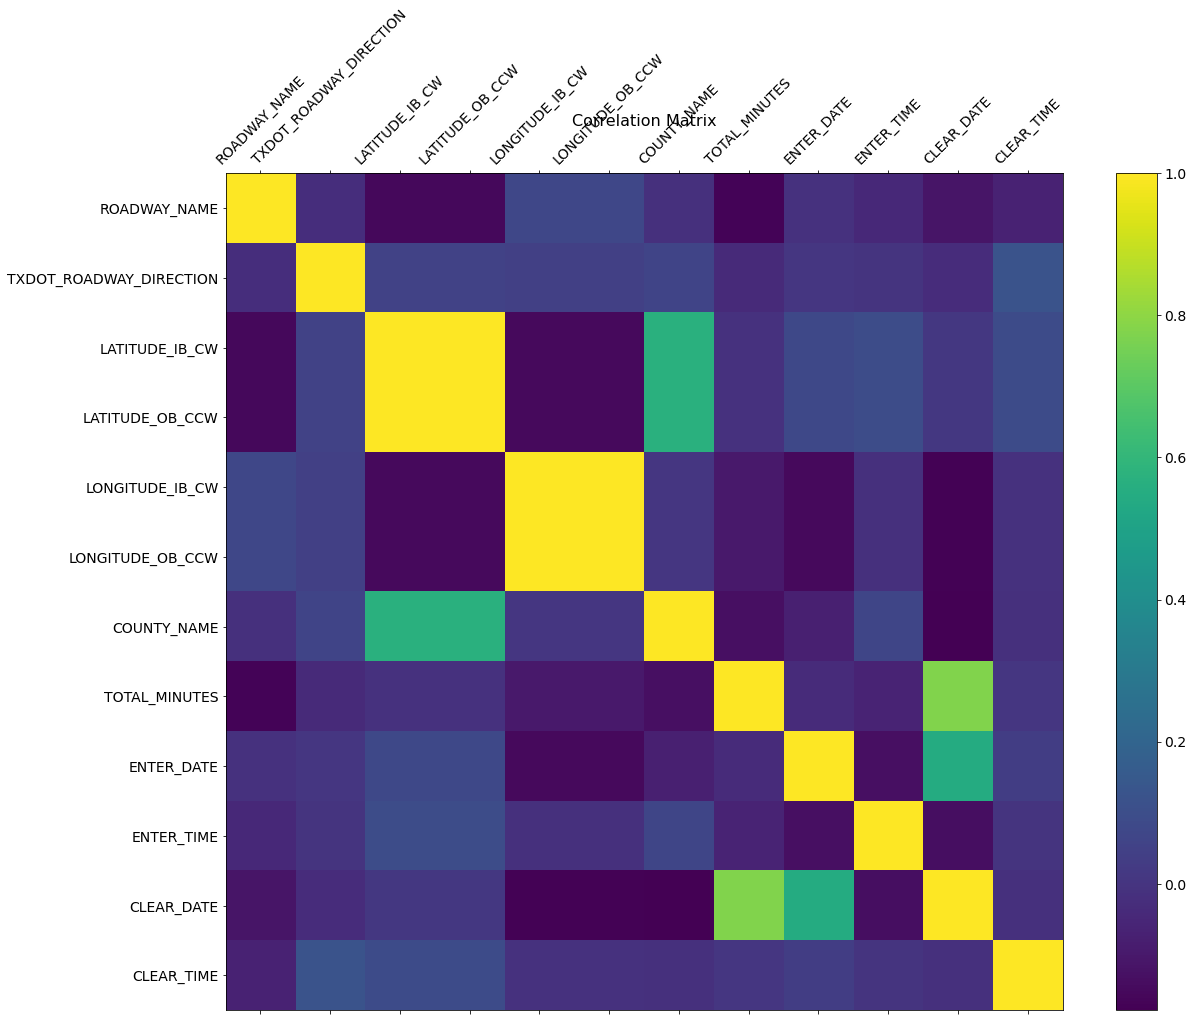

In [77]:

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


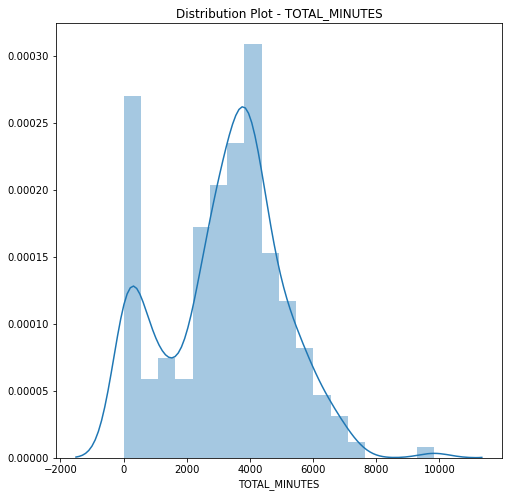

In [61]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Distribution Plot - TOTAL_MINUTES")
sn.distplot(inc_df['TOTAL_MINUTES'])

In [70]:
rainfall = pd.read_csv("Rainfall.csv")

FileNotFoundError: [Errno 2] File Rainfall.csv does not exist: 'Rainfall.csv'

In [139]:
rainfall.head()

,CITY,LAT,LON,25-Aug,26-Aug,27-Aug,28-Aug,29-Aug,30-Aug,31-Aug,1-Sep,Totals,Sum,IsSum_Total_Same?
0,8101 N Corrigan,31.08,-95.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.96,0.0,0.0
1,8167 N Segno,30.42,-96.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.23,0.0,0.0
2,8196 NNW Moss Hill,30.32,-96.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.82,0.0,0.0
3,8214 N High Island,29.55,-95.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.12,0.0,0.0
4,8343 N High Island,28.99,-95.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.99,0.0,0.0


In [140]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 14 columns):
CITY                 2880 non-null object
LAT                  2867 non-null float64
LON                  2867 non-null float64
25-Aug               1784 non-null float64
26-Aug               1924 non-null float64
27-Aug               2062 non-null float64
28-Aug               2057 non-null object
29-Aug               1735 non-null float64
30-Aug               1488 non-null float64
31-Aug               1344 non-null float64
1-Sep                1036 non-null object
Totals               2880 non-null float64
Sum                  2880 non-null float64
IsSum_Total_Same?    2880 non-null float64
dtypes: float64(11), object(3)
memory usage: 315.2+ KB


In [138]:
rainfall = rainfall.drop(columns={'Unnamed: 0'})

In [142]:
rainfall.describe()

,LAT,LON,25-Aug,26-Aug,27-Aug,29-Aug,30-Aug,31-Aug,Totals,Sum,IsSum_Total_Same?
count,2867.000000,2867.000000,1784.000000,1924.000000,2062.000000,1735.000000,1488.000000,1344.000000,2880.000000,2880.000000,2880.000000
mean,30.490019,11.908271,0.303290,1.687583,3.949588,1.900767,0.520081,0.111763,9.525764,7.307469,0.854861
std,1.477999,96.824948,0.532686,2.549519,5.040256,4.612218,1.963388,0.890446,13.364237,11.926674,0.352302
min,25.909039,-101.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.734393,-96.585000,0.000000,0.050000,0.140000,0.000000,0.000000,0.000000,0.480000,0.057500,1.000000
50%,30.178806,95.583452,0.050000,0.490000,1.400000,0.010000,0.000000,0.000000,2.605000,1.155000,1.000000
75%,30.950000,97.940714,0.382500,2.210000,6.170000,1.005000,0.000000,0.000000,12.682500,8.272500,1.000000
max,36.378300,106.626670,7.550000,14.400000,27.360000,31.350000,23.820000,26.140000,60.580000,60.580000,1.000000


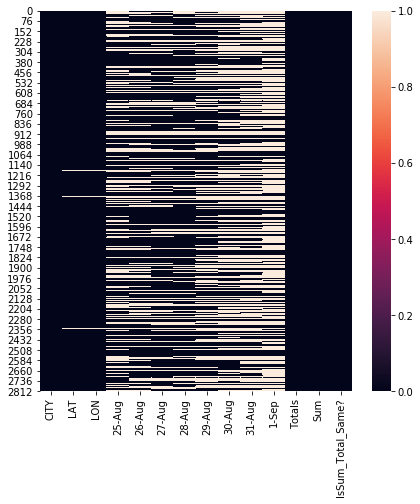

In [146]:
#check for missing vals
fig, ax = plt.subplots(figsize=(7,7))
sn.heatmap(rainfall.isnull())

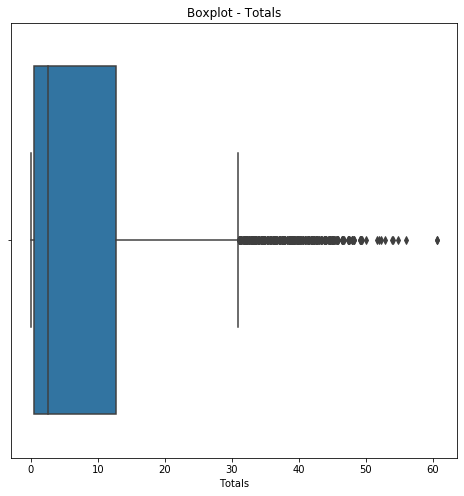

In [151]:
fix, ax = plt.subplots(figsize=(8,8))
ax.set_title("Boxplot - Totals")

sn.boxplot(rainfall['Totals'], ax=ax)
#sn.boxplot(rainfall['Sum'], ax=axes[0,1])


In [152]:
peaks = pd.read_csv("Hurricane_Harvey_Peaks_Modified.csv")

In [153]:
peaks.head()

,latitude_dd,longitude_dd,state,county,waterbody,peak_date,peak_stage,height_above_gnd
0,28.078222,-97.095639,TX,Aransas County,Corpus Christi Bay,8/26/2017 5:00:00 PM,5.52,2.1
1,28.111389,-97.026694,TX,Aransas County,Corpus Christi Bay,8/26/2017 5:00:00 PM,5.37,0.0
2,28.101194,-97.046830,TX,Aransas County,Corpus Christi Bay,8/26/2017 5:00:00 PM,6.11,0.0
3,28.105800,-97.046270,TX,Aransas County,Corpus Christi Bay,8/25/2017 5:00:00 PM,6.32,NaN
4,27.891444,-97.237333,TX,San Patricio County,Corpus Christi Bay,8/25/2017 5:00:00 PM,19.51,0.0


In [155]:
peaks['county'] = pd.Categorical(peaks['county'])
peaks['waterbody'] = pd.Categorical(peaks['waterbody'])

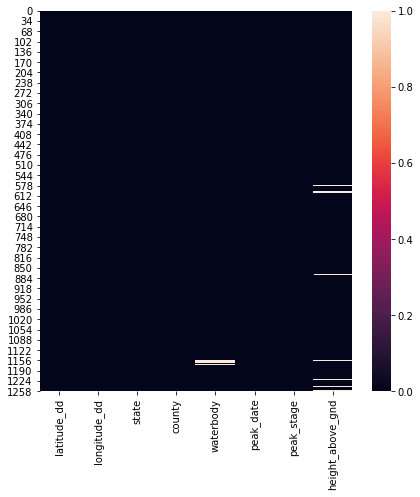

In [156]:
#check for missing vals
fig, ax = plt.subplots(figsize=(7,7))
sn.heatmap(peaks.isnull())

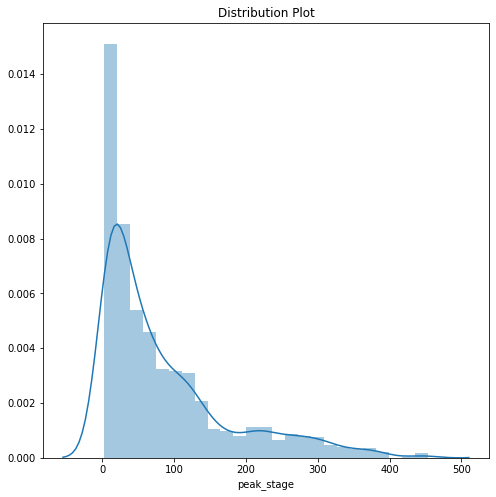

In [157]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Distribution Plot")
sn.distplot(peaks['peak_stage'])